In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas_datareader import DataReader
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
from __future__ import division

In [ ]:
yf.pdr_override()

In [ ]:
tech_list=['AAPL','GOOG','MSFT','AMZN']


In [ ]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [ ]:
for stock in tech_list:
   globals()[stock] = pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,166.009995,167.190002,164.429993,165.809998,164.825790,55474100
2022-08-05,163.210007,165.850006,163.000000,165.350006,164.596848,56697000
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168777,63135500
2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469131,70170500
...,...,...,...,...,...,...
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100
2023-08-01,196.240005,196.729996,195.279999,195.610001,195.610001,35175100


In [ ]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000


In [ ]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.975937,160.753148,157.407490,159.149203,158.803166,7.015692e+07
std,17.956218,17.724282,18.276032,17.998889,18.144256,2.333310e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.470390,5.277610e+07
50%,154.789993,157.089996,153.369995,155.000000,154.602554,6.557380e+07
75%,171.850006,173.295006,171.139999,172.070007,171.955002,8.073500e+07
max,196.240005,198.229996,195.279999,196.449997,196.449997,1.647624e+08


In [ ]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-04 to 2023-08-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

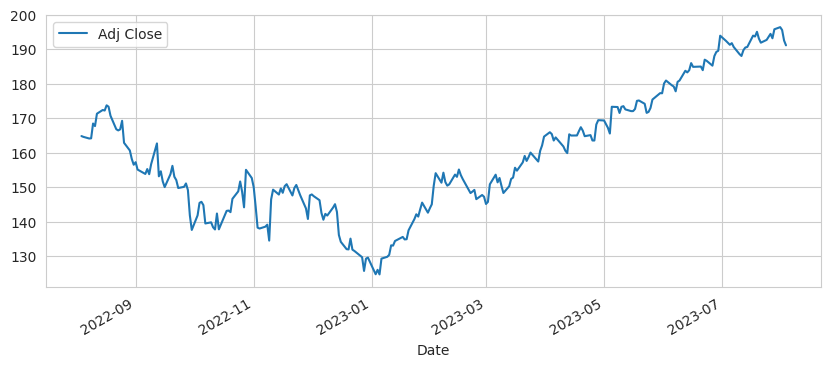

In [ ]:
AAPL['Adj Close'].plot(legend=True , figsize=(10,4))

<Axes: xlabel='Date'>

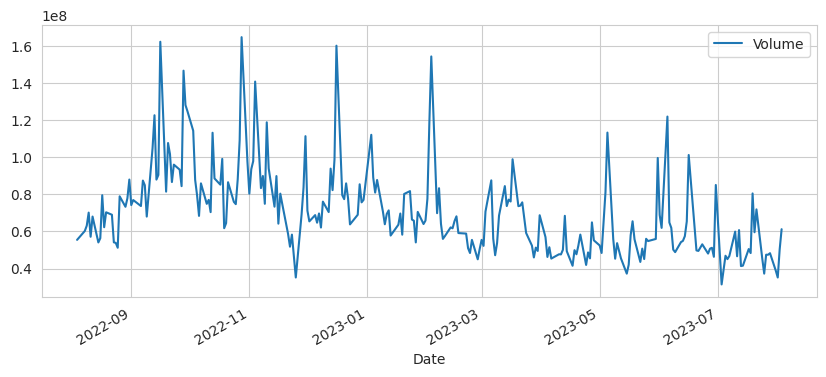

In [ ]:
AAPL['Volume'].plot(legend=True , figsize=(10,4))

In [ ]:
ma_day= [10,20,50]

for ma in ma_day:
  column_name = "MA for %s days" %(str(ma))
  AAPL[column_name]= AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

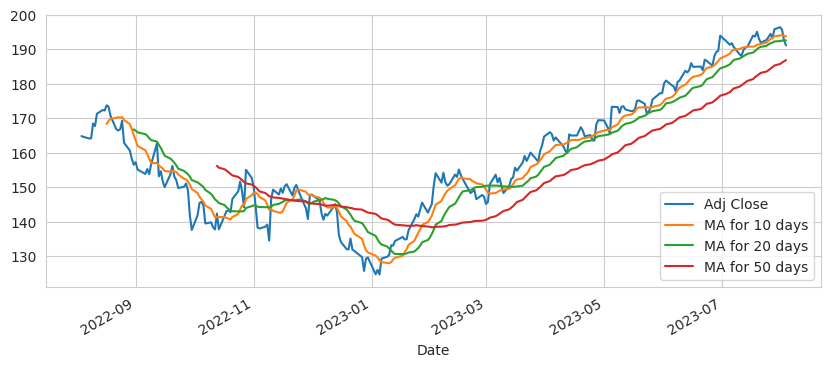

In [ ]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(legend=True , figsize=(10,4))

In [ ]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

<Axes: xlabel='Date'>

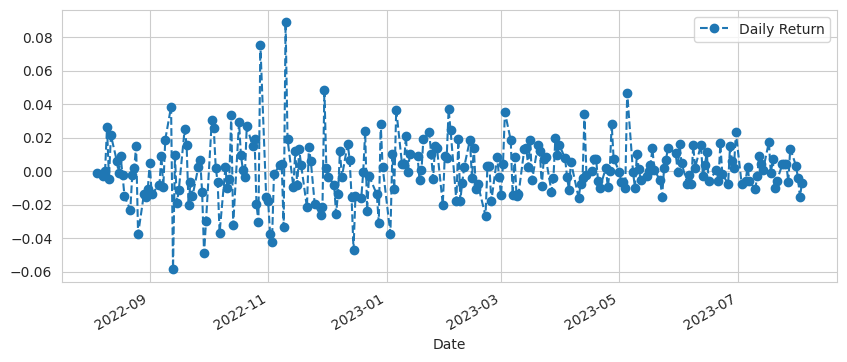

In [ ]:
AAPL['Daily Return'].plot(legend=True , figsize=(10,4) , linestyle='--' , marker='o')

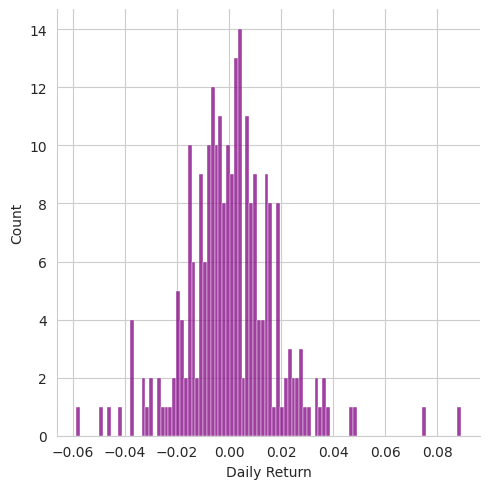

In [ ]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<Axes: >

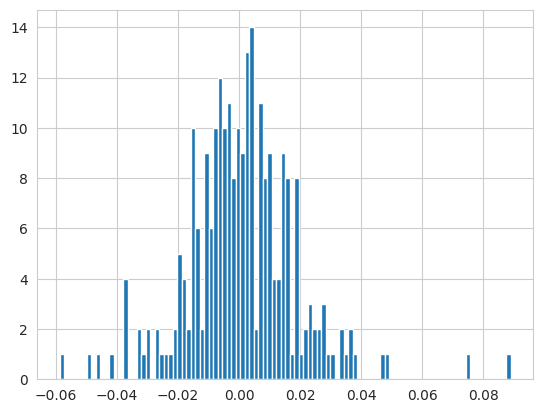

In [ ]:
AAPL['Daily Return'].hist(bins=100)

In [ ]:
closing_df =  pdr.get_data_yahoo(tech_list, start, end)['Adj Close']


[*********************100%***********************]  4 of 4 completed


In [ ]:
closing_df

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-04,164.825790,142.570007,118.870003,280.934448
2022-08-05,164.596848,140.800003,118.220001,280.201508
2022-08-08,164.119019,139.410004,118.139999,277.636292
2022-08-09,164.168793,137.830002,117.500000,279.597321
2022-08-10,168.469131,142.690002,120.650002,286.391693
...,...,...,...,...
2023-07-28,195.830002,132.210007,133.009995,338.369995
2023-07-31,196.449997,133.679993,133.110001,335.920013
2023-08-01,195.610001,131.690002,131.889999,336.339996


In [ ]:
tech_rets = closing_df.pct_change()
tech_rets

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-04,NaN,NaN,NaN,NaN
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024301
...,...,...,...,...
2023-07-28,0.013508,0.030877,0.024178,0.023131
2023-07-31,0.003166,0.011119,0.000752,-0.007241
2023-08-01,-0.004276,-0.014886,-0.009165,0.001250


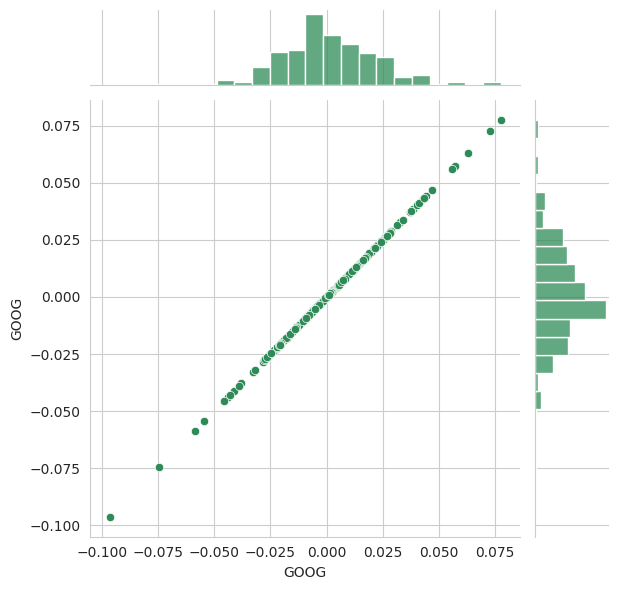

In [ ]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets , kind='scatter',color='seagreen')

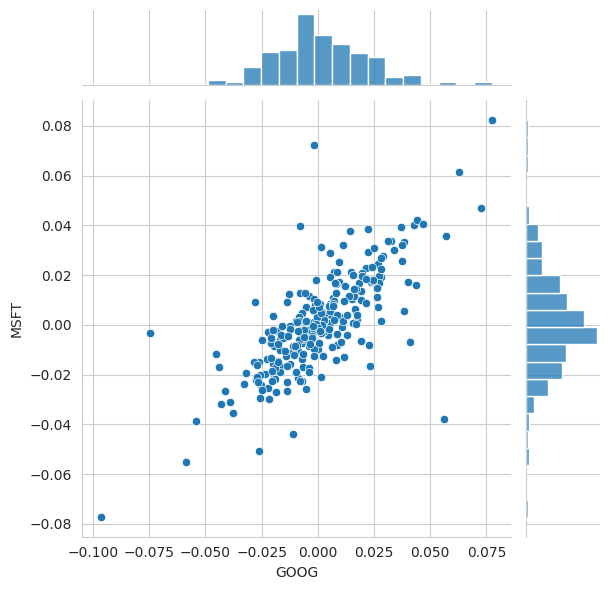

In [ ]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets , kind='scatter')

In [ ]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-04,NaN,NaN,NaN,NaN
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024301


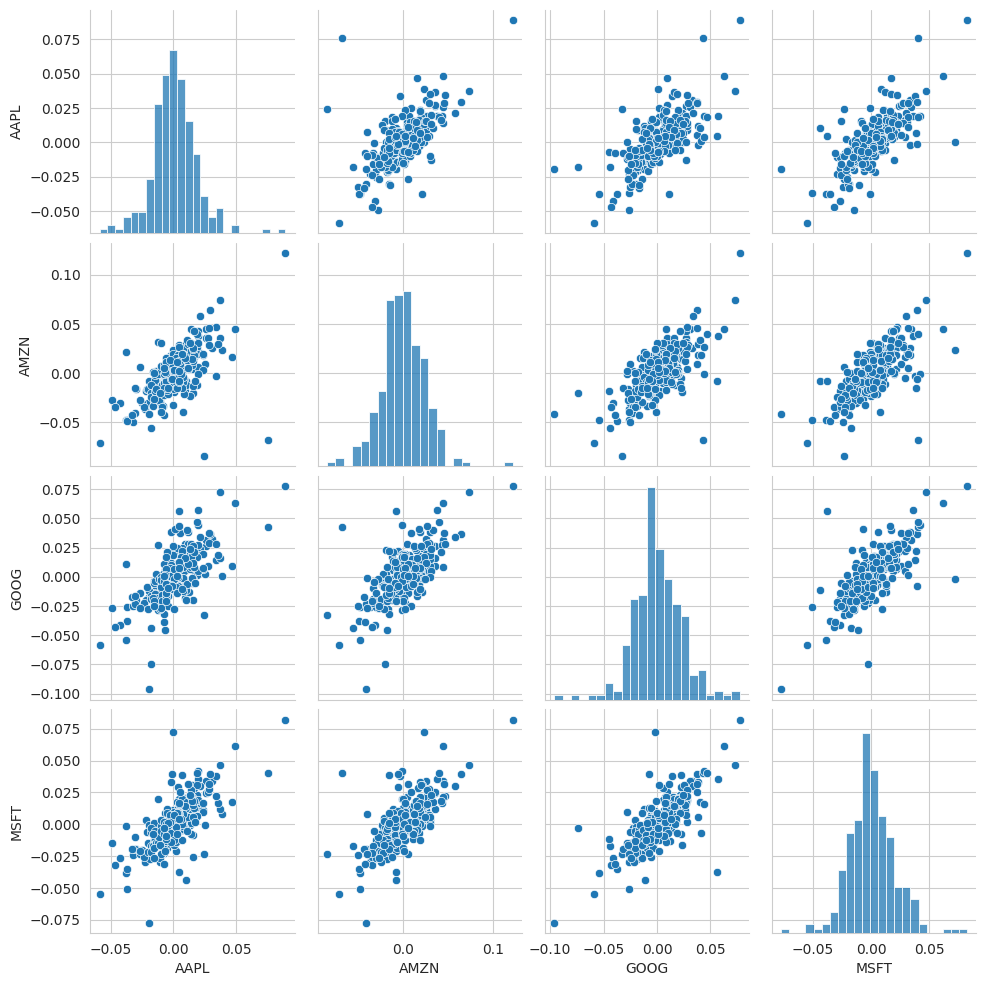

In [ ]:
sns.pairplot(tech_rets.dropna())

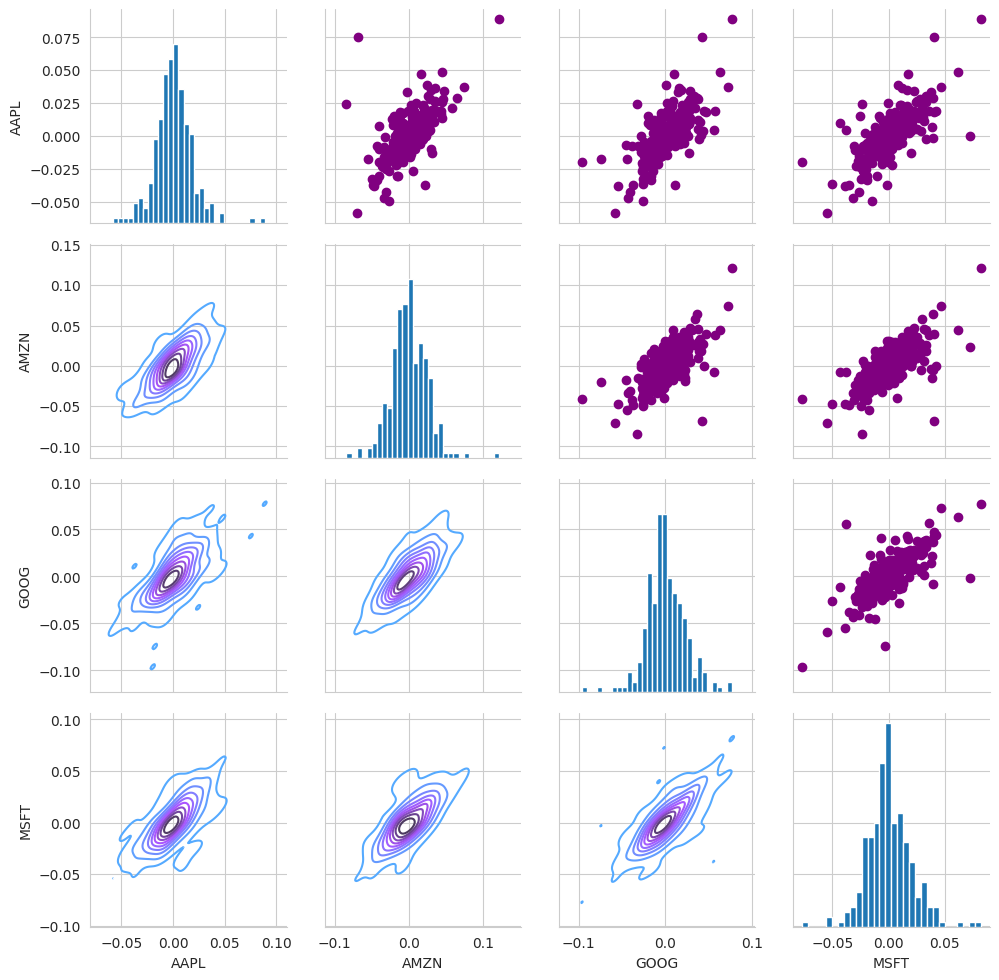

In [ ]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter , color='purple')
returns_fig.map_lower(sns.kdeplot , cmap='cool_d')
returns_fig.map_diag(plt.hist , bins=30)

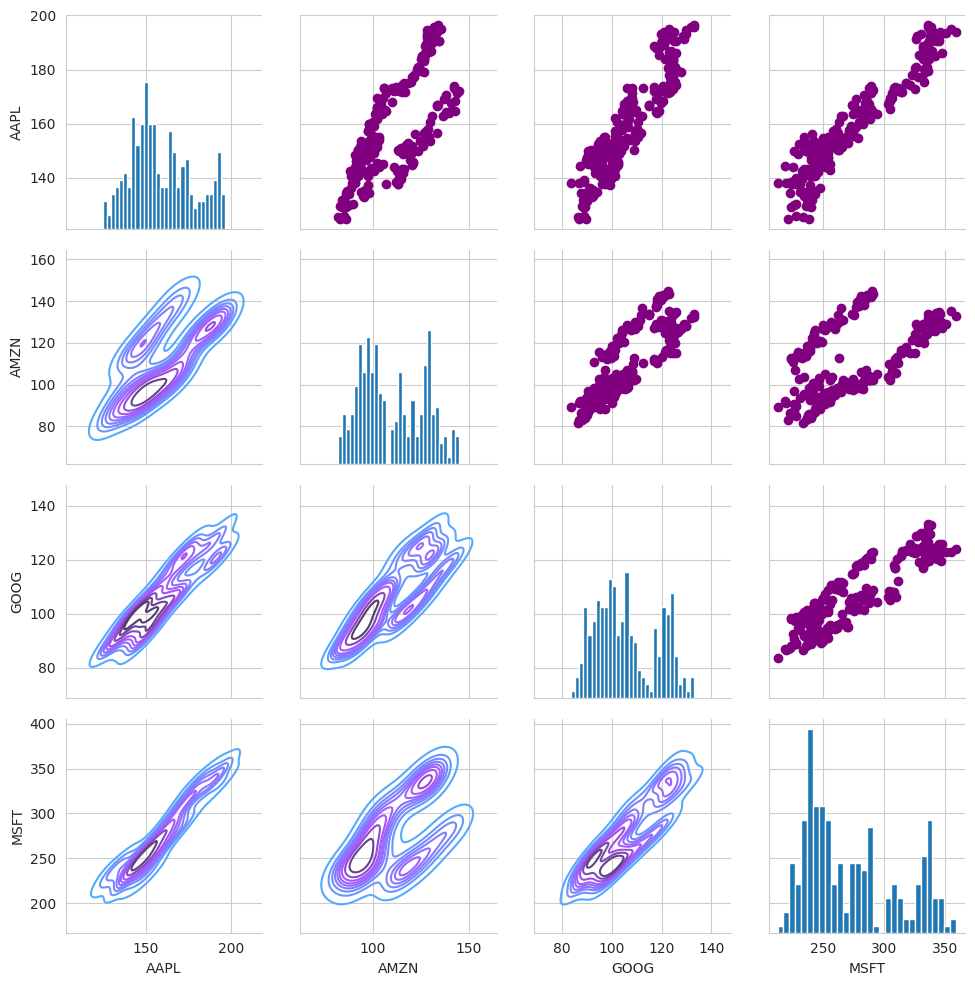

In [ ]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter , color='purple')
returns_fig.map_lower(sns.kdeplot , cmap='cool_d')
returns_fig.map_diag(plt.hist , bins=30)

<Axes: >

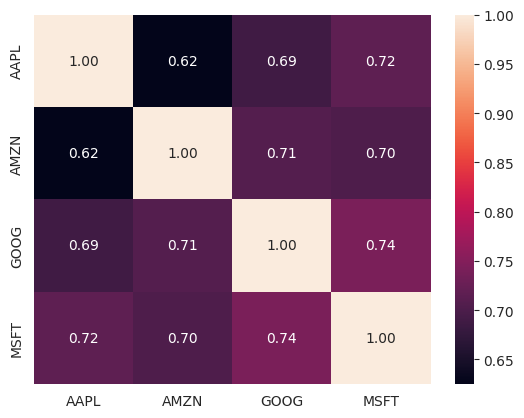

In [ ]:
# sns.corrplot(tech_rets.dropna() , annot=True)
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')

<Axes: >

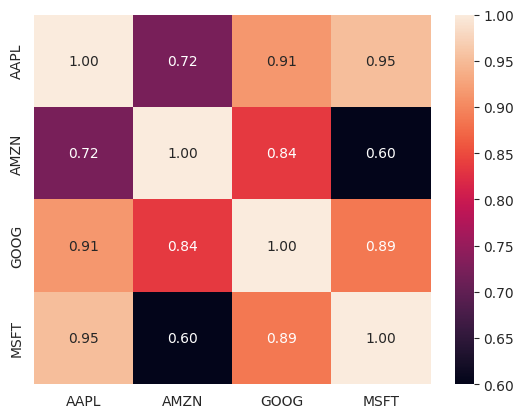

In [ ]:
closing_df_corr = closing_df.dropna().corr()
sns.heatmap(closing_df_corr ,annot=True, fmt='.2f' )

In [ ]:
rets = tech_rets.dropna()

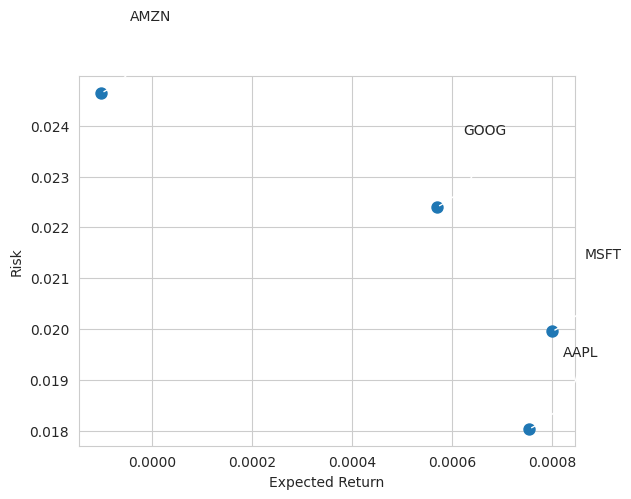

In [ ]:
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns , rets.mean() , rets.std()):
  plt.annotate(
      label,
      xy=(x,y),xytext=(50,50),
      textcoords = 'offset points',ha='right',va='bottom',
      arrowprops = dict(arrowstyle = '-' , connectionstyle = 'arc3,rad=-0.3')
  )

<ipython-input-31-74a26bdc39cf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna() , bins=100 , color='purple')


<Axes: xlabel='Daily Return', ylabel='Density'>

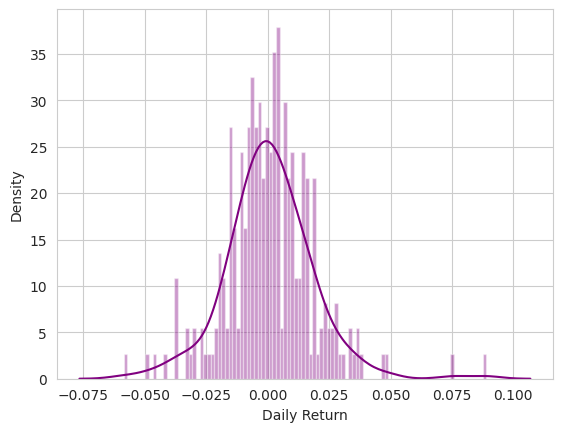

In [ ]:
sns.distplot(AAPL['Daily Return'].dropna() , bins=100 , color='purple')

In [ ]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-08-05,-0.001389,-0.012415,-0.005468,-0.002609
2022-08-08,-0.002903,-0.009872,-0.000677,-0.009155
2022-08-09,0.000303,-0.011333,-0.005417,0.007063
2022-08-10,0.026195,0.035261,0.026809,0.024301
2022-08-11,-0.004432,-0.014367,-0.006879,-0.007401


In [ ]:
rets['AAPL'].quantile(0.05)
# for 95% of time worst loss in return
# here it is 28% loss

-0.028527649458612928

In [ ]:
# u(delta t) is drift term
# sigma*epsilon*root(delta t) is shock term


In [ ]:
def stock_monte_carlo(start_price , days , mu , sigma):

  price = np.zeros(days)
  price[0]=start_price

  shock = np.zeros(days)
  drift = np.zeros(days)

  dt = 1/days

  for x in range(1,days):
    shock[x] = np.random.normal(loc=mu*dt , scale = sigma*np.sqrt(dt))
    drift[x] = mu*dt
    price[x] = price[x-1] + (price[x-1] * ( drift[x] + shock[x] ))

  return price

In [ ]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-04,118.300003,119.500000,117.709999,118.870003,118.870003,15757700
2022-08-05,116.930000,118.860001,116.709999,118.220001,118.220001,15615700
2022-08-08,119.120003,120.860001,117.830002,118.139999,118.139999,17061100
2022-08-09,117.989998,118.199997,116.559998,117.500000,117.500000,15424300
2022-08-10,119.589996,121.779999,119.360001,120.650002,120.650002,20497000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

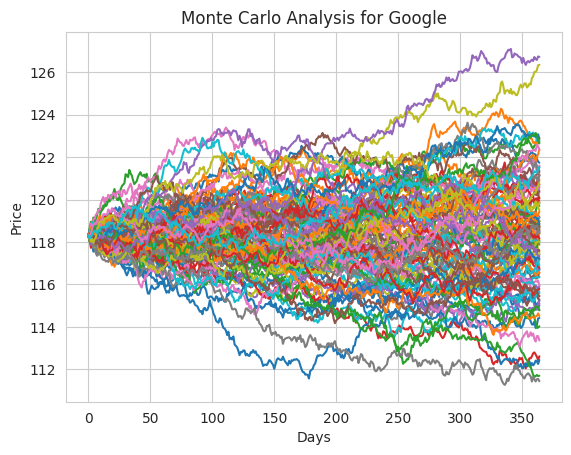

In [ ]:
start_price = 118.300003

for i in range(100):
  plt.plot(stock_monte_carlo (start_price , days , mu , sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')


In [ ]:
runs=10000
simulations = np.zeros(runs)

for run in range(runs):
  simulations[run] = stock_monte_carlo(start_price , days , mu , sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google stock after 365 days')

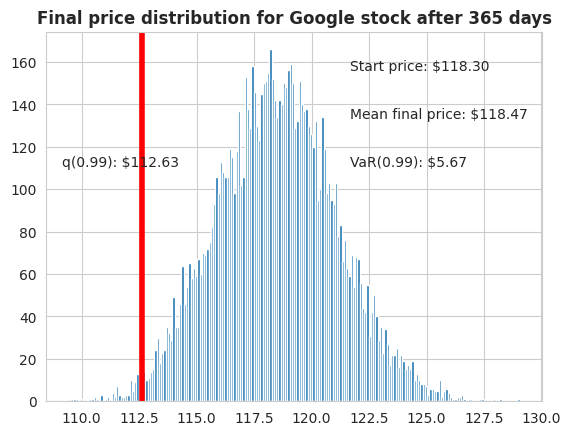

In [ ]:
q = np.percentile(simulations,1)
plt.hist(simulations , bins=200)

# starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# variance of price within 99% confidence interval
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" %(start_price -q))

# display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# plot a line at the 1% quantile result
plt.axvline(x=q , linewidth=4 , color='r')

# title
plt.title("Final price distribution for Google stock after %s days" %days,weight='bold')